# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Load dataset
customers = pd.read_csv("clustered_data.csv")
customers.head()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender,Profession,Cluster
0,0.000000,0.191919,0.078958,0.39,0.058824,0.375,1,5,3
1,0.000500,0.212121,0.184236,0.81,0.176471,0.250,1,2,2
2,0.001001,0.202020,0.452694,0.06,0.058824,0.000,0,2,0
3,0.001501,0.232323,0.310569,0.77,0.000000,0.125,0,7,1
4,0.002001,0.313131,0.200027,0.40,0.117647,0.625,0,3,4


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
# Pisahkan fitur (X) dan target (y)
X = customers[['Spending Score (1-100)', 'Profession', 'Gender']]
y = customers['Cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(1592, 3), y_train=(1592,)
Test set shape: X_test=(398, 3), y_test=(398,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [4]:
# Model Klasifikasi
knn = KNeighborsClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

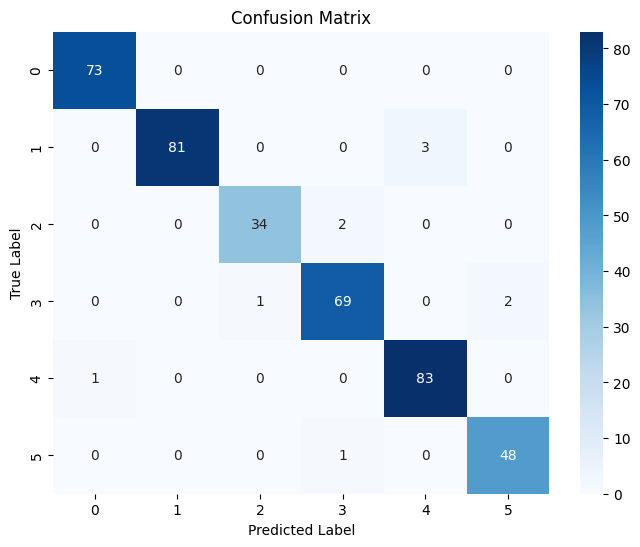

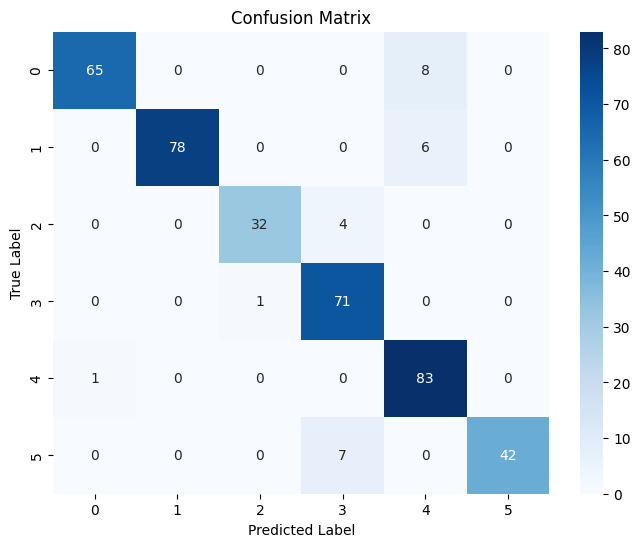

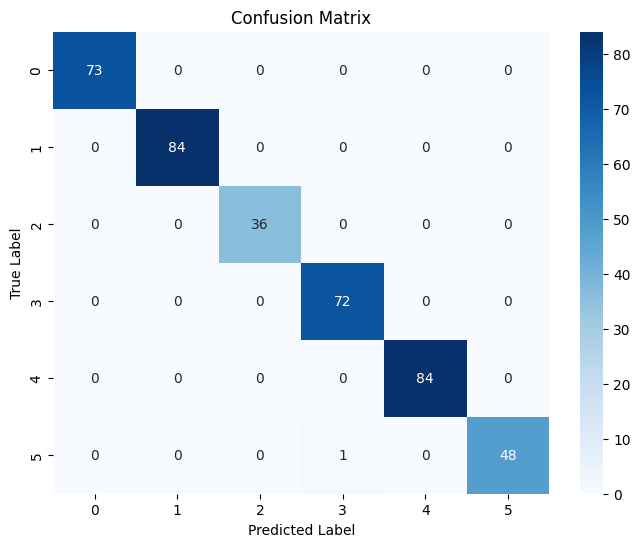

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.974874   0.975112  0.974874  0.974858
1  Support Vector Machine (SVM)  0.932161   0.939751  0.932161  0.932695
2              Naive Bayes (NB)  0.997487   0.997522  0.997487  0.997483


In [5]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [6]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [7]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Analisis Model:
- K-Nearest Neighbors (KNN): memiliki nilai accuracy sebesar 0.974874, precision sebesar 0.975112, recall sebesar 0.974874, dan F1-score sebesar 0.974858. Hasil ini sudah sangat baik dalam menangani kasus klasifikasi dalam studi kasus ini, namun memang masih memiliki hasil yang kalah besar oleh Naive Bayes.

- Support Vector Machine (SVM) : memiliki nilai accuracy sebesar 0.932161, precision sebesar 0.939751, recall sebesar 0.932161, dan F1-score sebesar 0.932695. Hasilnya sudah cukup baik, namun memiliki nilai yang paling rendah dibandingkan kedua model lainnya.

- Naive Bayes (NB) : memiliki nilai accuracy sebesar 0.997487, precision sebesar 0.997522, recall sebesar 0.997487, dan F1-score sebesar 0.997483. Merupakan model dengan hasil yang paling baik untuk studi kasus kali ini.

Kesimpulan:
- Ketiga model yang digunakan menghasilkan nilai metrik evaluasi yang sangat baik (di atas 0.9), baik untuk accuracy, precision, recall, maupun F1-score. Oleh karena itu, bisa disimpulkan ketiga model tidak mengalami overfitting maupun underfitting.
- Hasil terbaik diraih oleh Naive Bayes, dengan rata-rata nilai pada keempat metrik evaluasi di atas 0.99, sehingga menjadi model yang paling cocok untuk digunakan dalam kasus klasifikasi ini dibandingkan dengan kedua model lainnya.
- Hasil klasifikasi pada kasus ini sudah sangat memuaskan.